# Linear Regression

#### What is Linear Regression?
Linear Regression is a supervised Machine Learning algorithm it is also considered to be the most simple type of predictive Machine Learning algorithm. There is some basic assumption that we make for linear regression to work, such as it is important that the relation between the independent and the target variable is linear in nature else our model will end up giving irrelevant results.
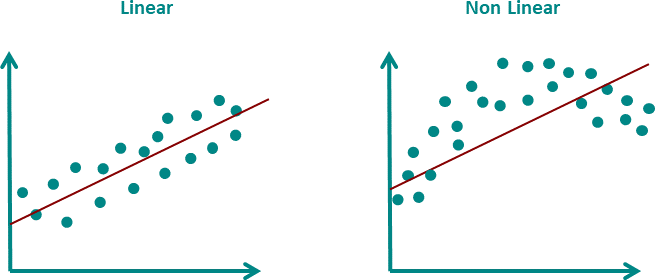

The word Linear in Linear Regression suggests that the function used for the prediction is a linear function. This function can be represented as shown below:
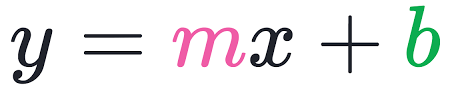

Now, you might be familiar with this equation, in fact, we all have used this equation this is the equation of a straight line. In terms of linear regression, **y in this equation stands for the predicted value, x means the independent variable and m & b are the coefficients we need to optimize in order to fit the regression line to our data.**



- m is the lines slope which measures how steep the line is slanted

**In a line, slope is a ratio of the change in one variable to the change in the other.**


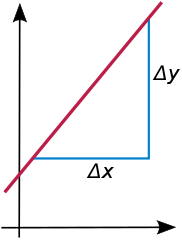

- b is the y-intercept and determines at which point the line intercepts the y-axis
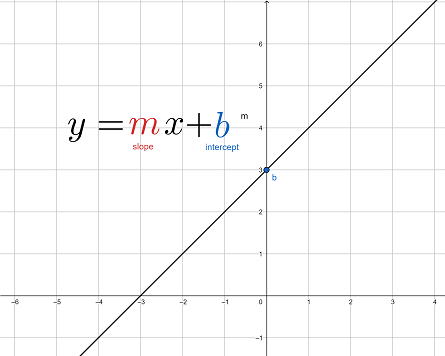


**Example:**
***
Suppose a company collects data on the salaries of their employees (y) and the length of time that their employees have been with the company (x). From this data, they obtain the regression line

$ y = 0.536x + 40 $

where x is measured in years and y is measured in thousands of dollars.

First, interpret the slope. The slope is 0.536 and the units are thousands of dollars per year. 0.536 in thousands of dollars is \\$536. So, for every year an employee stays with the company, they will get a raise of approximately \\$536 per year. An alternate statement could be that the rate of change in an employee's salary is approximately 0.536 thousand dollars per year.

Next, interpret the intercept. The value of the intercept is 40, and it is measured in thousands of dollars; so, in the scenario, it represents \\$40,000. This relates to when the value of x, or the number of years the person has been with the company, is 0. So, a person could expect their starting salary to be about \\$40,000 if they start working at this company.

#### Calculating coefficient of the equation:
To calculate the coefficients we need the formula for Covariance and Variance, so the formula for these are:
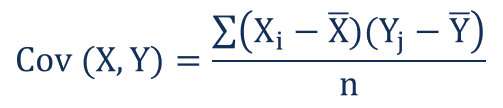


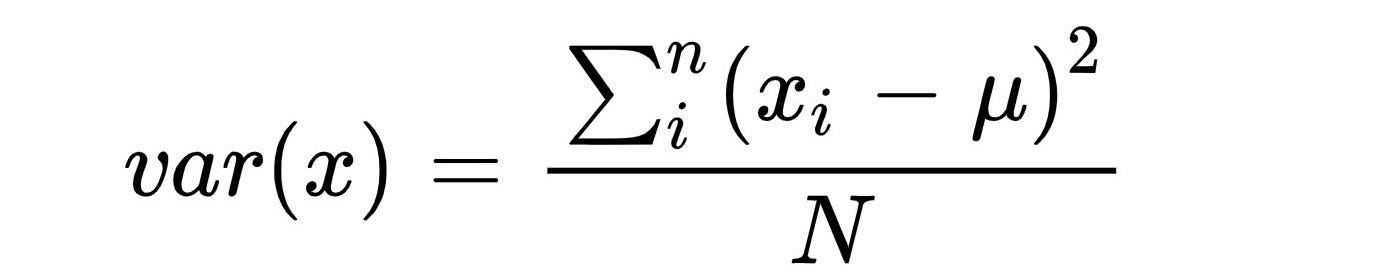

To calculate the coefficient m we will use the formula given below

$ m = cov(x, y) / var(x) $


$ b = mean(y) — m * mean(x) $

## We start by importing the dataset and our dependencies

In [52]:
#import libraries
#"Matplotlib inline" allows you to interact with your plots directly in the
# notebook or shell output, such as zooming, panning, and saving.
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Let's find the relationship between the Head Size and Brain weights.

In [55]:
# initializing our inputs and outputs
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

In [56]:
Y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

In [57]:
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [58]:
#total number of values
n = len(X)

In [59]:
n

237

In [60]:
# using the formula to calculate the b1 and b0
covariance = 0
variance = 0
for i in range(n):
    covariance += (X[i] - x_mean) * (Y[i] - y_mean)
    variance += (X[i] - x_mean) ** 2
    

In [61]:
print("covariance: ", covariance )
print("variance: ", variance)

covariance:  8294376.74683544
variance:  31486153.983122338


In [62]:
m = covariance / variance
b = y_mean - (m * x_mean)

In [63]:
#printing the coefficient
print(m, b)

0.26342933948939945 325.57342104944223


Now we have our bias coefficient(b) and scale factor(m). In mathematical terms :

$ Brain weights =  325.57342104944223 + 0.26342933948939945 * Head size $ 

Now we have a linear model.

Lets plot it graphically.

In [65]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100

In [66]:
x_max

4847

In [67]:
x_min

2620

In [68]:
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b + m * x



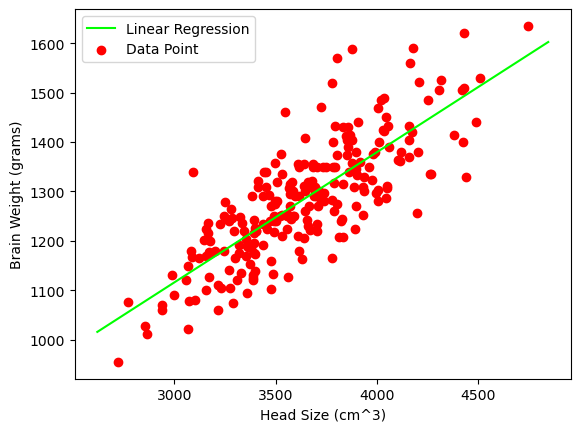

In [69]:
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Head Size (cm^3)')
#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

We need to able to measure how good our model is (accuracy). There are many methods to achieve this but we would implement Root mean squared error and coefficient of Determination (R² Score).

#### Root Mean Squared Error is the square root of the sum of all errors divided by the number of values.
Mathematically,

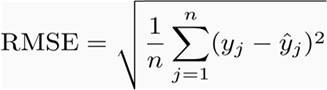

Here $ \hat{y_{j}} $ is the ith predicted output values. Now we will find RMSE.

In [71]:
rmse = 0
for i in range(n):
    y_pred=  b + m* X[i]
    rmse += (Y[i] - y_pred) ** 2   

In [72]:
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


Let's find our R² score to be able to measure the accuracy of our linear model, mathematically :

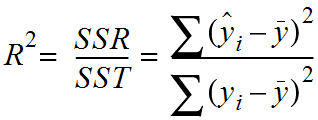

 **SST** is the total sum of squares and **SSR** is the total sum of squares of residuals.

**R² Score usually ranges from 0 to 1. It will also become negative if the model is completely wrong. Now we will find the R² Score.**

In [74]:
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b + m * X[i]
    sumofresiduals += (Y[i] - y_pred) **2
    sumofsquares += (Y[i] - y_mean) ** 2
    
    

In [75]:
score  =1-(sumofresiduals/sumofsquares)
print(score)

0.6393117199570003


**0.63 is certainly not bad**, but we can improve the score by :

- Getting more datasets
- Improving the features
- Fit many models etc

# Logistic Regression vs Linear Regression

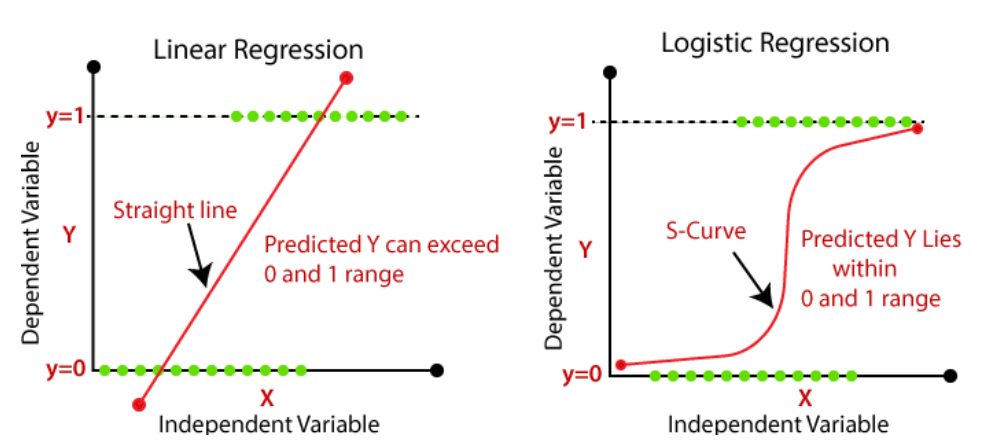

### The Sigmoid Function
The reason why the logistic regression model has a bend in its curve is because it is not calculated using a linear equation. Instead, logistic regression models are built using the **Sigmoid Function** (also called the Logistic Function because of its use in logistic regression).

The main characteristic of the Sigmoid Function worth understanding is this: 
#### No matter what value you pass into it, it will always generate an output somewhere between 0 and 1.

The equation is shown below:
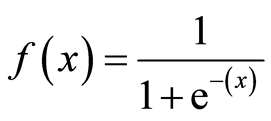

To use the linear regression model to make predictions, you generally need to specify a **cutoff point**. This cutoff point is typically 0.5.

Let’s use cancer diagnosis example. If the logistic regression model outputs a value below 0.5, then the data point is categorized as a non-malignant tumor. Similarly, if the Sigmoid Function outputs a value above 0.5, then the tumor would be classified as malignant.

# Logistic Regression

## Steps
### Training:
- Initialize weights as zero
- Initialize bias as zero

#### Given a data point:
- Predict result by using 

$ \hat{y} = \frac{1}{1+ e^{-wx+b}} $

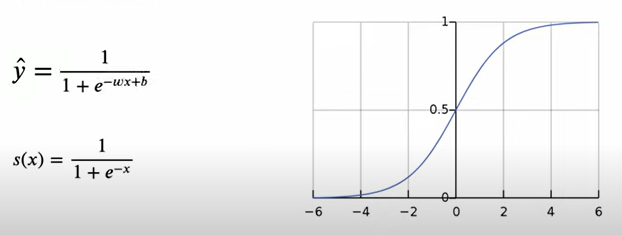

- Calculate error
Cross entropy loss is a metric used in machine learning to measure how well a classification model performs. The loss (or error) is measured as a number between 0 and 1, with 0 being a perfect model. The goal is generally to get your model as close to 0 as possible.

- Use gradient descent to figure out new weights and bias
- Repeat n times





### Testing:

#### Given a data point:
- Put the values from the data point into the equation 

$ \hat{y} = \frac{1}{1+ e^{-wx+b}} $

- Choose the label based on the probability

In [83]:
import numpy as np

In [84]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [85]:
class LogisticRegression():
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr=lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) *  np.sum(predictions - y)
            
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
        
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
        

### Logistic Regression

### What is Logistic Regression? Why it is used for classification?

Logistic regression is a statistical model used to analyze the dependent variable is dichotomous (binary) using logistic function. As the logistic or sigmoid function used to predict the probabilities between 0 and 1, the logistic regression is mainly used for classification.

### What is Logistic or Sigmoid Function?

As per Wikepedia, “A sigmoid function is a mathematical function having a characteristic “S”-shaped curve or sigmoid curve.” The output of sigmoid function results from 0 to 1 in a continous scale.

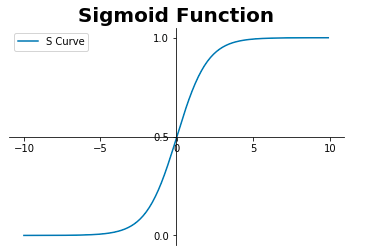

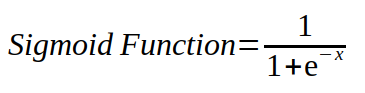

### Why we need to use cross entropy cost function rather than mean squared error for logistic regression?

Cross-entropy cost function measures the performance of a classification model whose output is a probability value between 0 and 1. It is also called log loss.

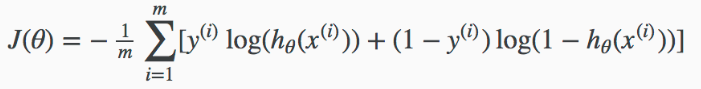

In linear regression, we need to minimize the mean squared error using any optimization algorithm because the cost function is a convex function. It has only one local or global minima.



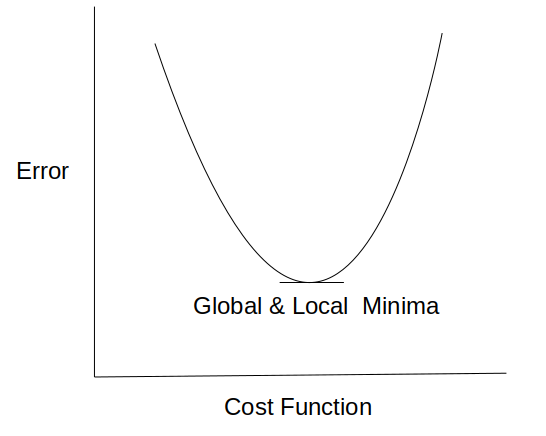

In logistic regression, if we use mean square error cost function with logistic function, it provides non-convex outcome which results in many local minima.

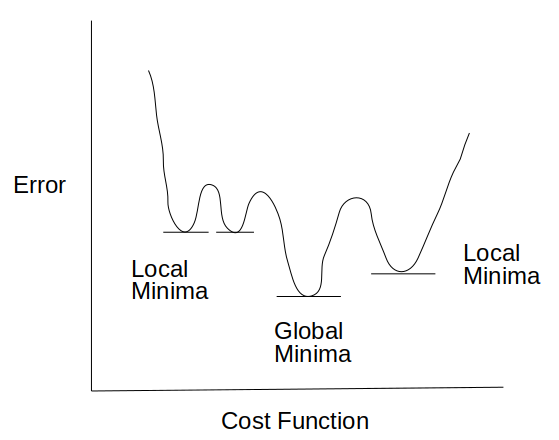

**Cross entropy** cost function with logistic function gives convex curve with one local/global minima.

As per the below figures, cost entropy function can be explained as follows:

1) if actual y = 1, the cost or loss reduces as the model predicts the exact outcome.

2) if actual y = 0, the cost pr loss increases as the model predicts the wrong outcome.

So If we join both the below curves, it is a convex with one global minima to predict the correct outcome (0 or 1)

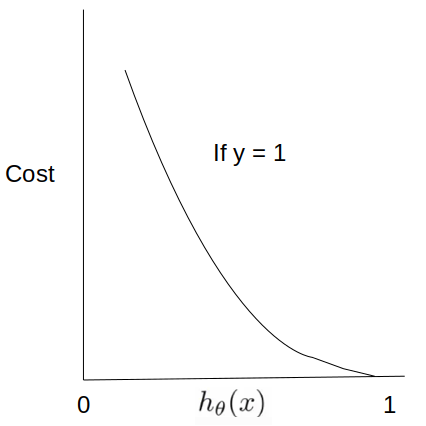

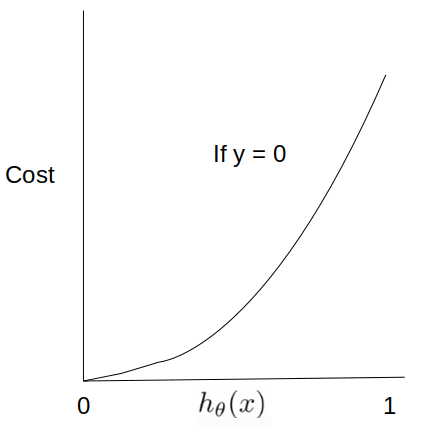

### How to determine the number of model parameters?

1) The number of model parameters(Theta) depends upon the number of independent variables.

2) For example, if we need to perform claasification using linear decision boundary and 2 independent variables available, the number of model parameters is 3.

### How to determine the decision boundary for logistic regression?

Decision boundary is calculated as follows:

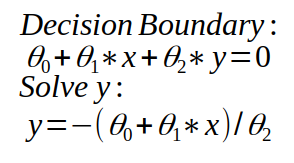

In [95]:
# Below is an example python code for binary classification using Logistic Regression
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [96]:
# Function to create random data for classification
def random():
    X1 = []
    X2 = []
    y = []

    np.random.seed(1)
    for i in range(0,20):
        X1.append(i)
        X2.append(np.random.randint(100))
        y.append(0)

    for i in range(20,50):
        X1.append(i)
        X2.append(np.random.randint(80,300))
        y.append(1)

    return X1,X2,y

In [97]:
def standardize(data):
    data -= np.mean(data)
    data /= np.std(data)
    return data

In [98]:
def plot(X):
    plt.scatter(X[:,0],X[:,1])
    plt.xlabel('X1',fontweight="bold",fontsize = 15)
    plt.ylabel('X2',fontweight="bold",fontsize = 15)
    plt.title("Scatter Data",fontweight="bold",fontsize = 20)
    plt.show()

In [99]:
#Sigmoid Function used for Binary Classification

def sigmoid(X,theta):
    z = np.dot(X,theta.T)
    return 1.0/(1+np.exp(-z))

Cross-entropy cost function measures the performance of a classification model whose output is a probability value between 0 and 1. It is also called log loss.

In [101]:
def cost_function(h,y):
    loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
    return loss

Gradient descent algorithm used to optimize the model parameters(theta) by minimizing the log loss.

In [103]:
def gradient_descent(X,h,y):
    return np.dot(X.T,(h-y))/y.shape[0]

In [104]:
def update_loss(theta,learning_rate,gradient):
    return theta-(learning_rate*gradient)

In [105]:
def predict(X,theta):
    threshold = 0.5
    outcome = []
    result = sigmoid(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome

In [106]:
def plot_cost_function(cost):
    plt.plot(cost,label="loss")
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()

In [107]:
def plot_predict_classification(X,theta):
    plt.scatter(X[:,1],X[:,2])
    plt.xlabel('X1',fontweight="bold",fontsize = 15)
    plt.ylabel('X2',fontweight="bold",fontsize = 15)
    x = np.linspace(-1.5, 1.5, 50)
    y = -(theta[0] + theta[1]*x)/theta[2]
    plt.plot(x,y,color="red",label="Decision Boundary")
    plt.title("Decision Boundary for Logistic Regression",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()

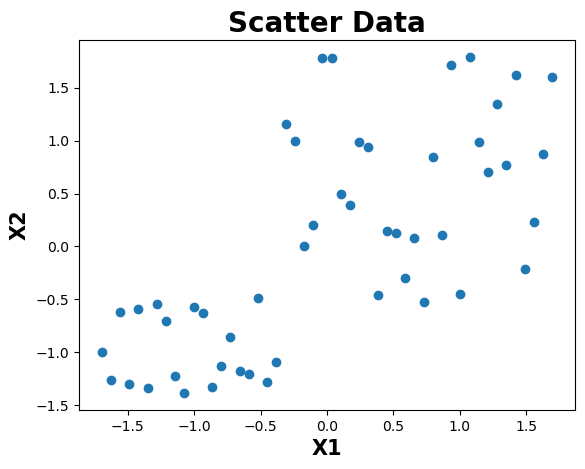

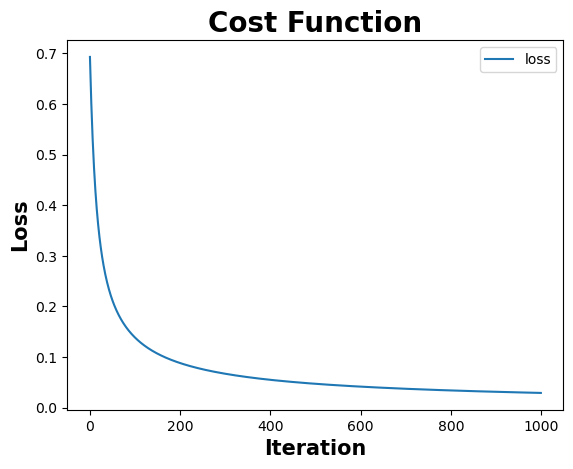

theta_0 : 1.731104110180229 , theta_1 : 3.384426535937368, theta_2 : 2.841095441821299
[[20  0]
 [ 0 30]]


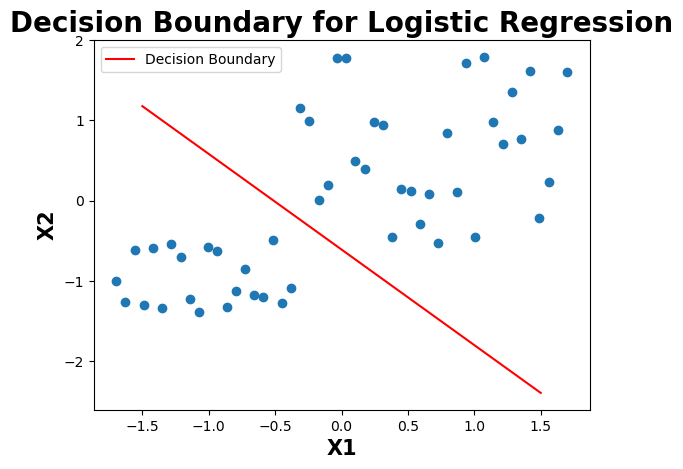

In [108]:
if __name__ == "__main__":

    X1,X2,y = random()

    X1 = standardize(X1)
    X2 = standardize(X2)

    X = np.array(list(zip(X1,X2)))

    y = np.array(y)

    plot(X)

    # Feature Length
    m = X.shape[0]

    # No. of Features
    n = X.shape

    # No. of Classes
    k = len(np.unique(y))

    # Initialize intercept with ones
    intercept = np.ones((X.shape[0],1))

    X = np.concatenate((intercept,X),axis= 1)

    # Initialize theta with zeros
    theta = np.zeros(X.shape[1])

    num_iter = 1000

    cost = []

    for i in range(num_iter):
        h = sigmoid(X,theta)
        cost.append(cost_function(h,y))
        gradient = gradient_descent(X,h,y)
        theta = update_loss(theta,0.1,gradient)


    outcome = predict(X,theta)

    plot_cost_function(cost)

    print("theta_0 : {} , theta_1 : {}, theta_2 : {}".format(theta[0],theta[1],theta[2]))

    metric = confusion_matrix(y,outcome)

    print(metric)

    plot_predict_classification(X,theta)

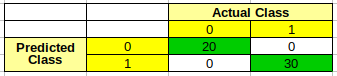

# DECISION TREE CLASSIFIER

### Introduction to Decision Tree
Formally a decision tree is a graphical representation of all possible solutions to a decision. These days,
tree-based algorithms are the most commonly used algorithms in case of supervised learning scenarios.
They are easier to interpret and visualize with great adaptability. We can use tree-based algorithms for both
regression and classification problems, However, most of the time they are used for classification problem.


Let’s understand a decision tree from an example: Yesterday evening, I skipped dinner at my usual time
because I was busy taking care of some stuff. Later in the night, I felt butterflies in my stomach. I thought
only if I wasn’t hungry, I could have gone to sleep as it is but as that was not the case, I decided to eat
something. I had two options, to order something from outside or cook myself.

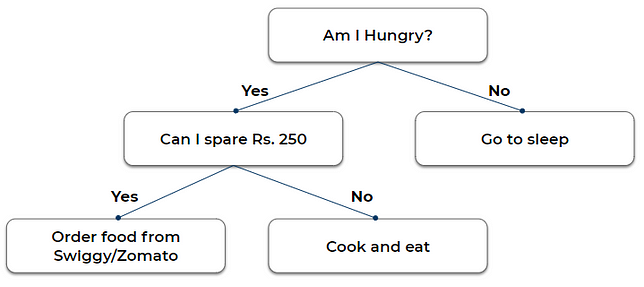

This representation is nothing but a decision tree.

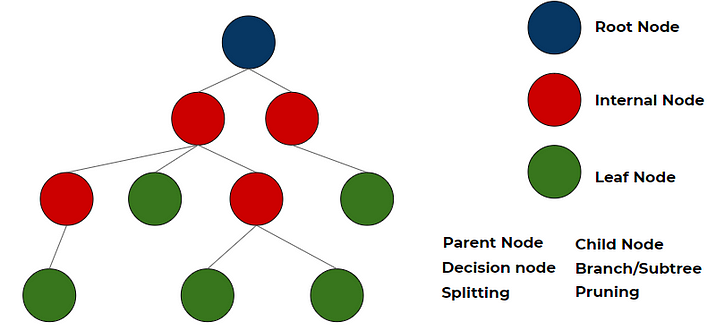

- Parent node: In any two connected nodes, the one which is higher hierarchically, is a parent node.
- Child node: In any two connected nodes, the one which is lower hierarchically, is a child node.
- Root node: The starting node from which the tree starts, It has only child nodes. The root node does not have a parent node. (dark blue node in the above image)
- Leaf Node/leaf: Nodes at the end of the tree, which do not have any children are leaf nodes or called simply leaf. (green nodes in the above image)
- Internal nodes/nodes: All the in-between the root node and the leaf nodes are internal nodes or simply called nodes. internal nodes have both a parent and at least one child. (red nodes in the above image)
- Splitting: Dividing a node into two or more sun-nodes or adding two or more children to a node.
- Decision node: when a parent splits into two or more children nodes then that node is called a decision node.
- Pruning: When we remove the sub-node of a decision node, it is called pruning. You can understand it as the opposite process of splitting.
- Branch/Sub-tree: a subsection of the entire tree is called a branch or sub-tree.


### Types of Decision Tree
#### Regression Tree
A regression tree is used when the dependent variable is continuous. The value obtained by leaf nodes in the training data is the mean response of observation falling in that region. Thus, if an unseen data observation falls in that region, its prediction is made with the mean value. This means that even if the dependent variable in training data was continuous, it will only take discrete values in the test set. A regression tree follows a top-down greedy approach.

#### Classification Tree
A classification tree is used when the dependent variable is categorical. The value obtained by leaf nodes in the training data is the mode response of observation falling in that region It follows a top-down greedy approach.

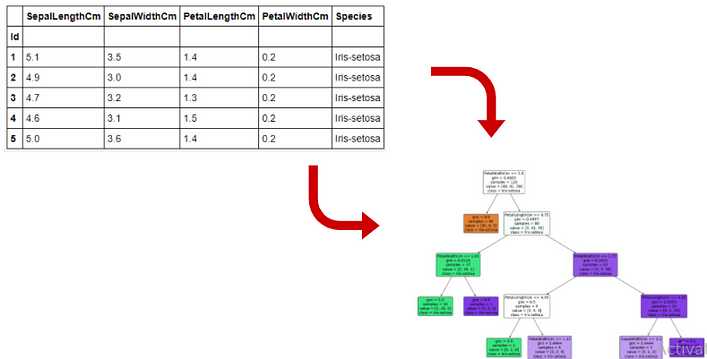

How to create a tree from tabular data? which feature should be selected as the root node? on what basis should a node be split? To all these questions answer is in this section

The decision of making strategic splits heavily affects a tree’s accuracy. The purity of the node should increase with respect to the target variable after each split. The decision tree splits the nodes on all available variables and then selects the split which results in the most homogeneous sub-nodes.

The following are the most commonly used algorithms for splitting

## Gini impurity
Gini says, if we select two items from a population at random then they must be of the same class and the probability for this is 1 if the population is pure.

- It works with the categorical target variable “Success” or “Failure”.
- It performs only Binary splits
- Higher the value of Gini higher the homogeneity.
- CART (Classification and Regression Tree) uses the Gini method to create binary splits.

**Steps to Calculate Gini impurity for a split**

- Calculate Gini impurity for sub-nodes, using the formula subtracting the sum of the square of probability for success and failure from one.
$ 1-(p²+q²) $

where p =P(Success) & q=P(Failure)


- Calculate Gini for split using the weighted Gini score of each node of that split
- Select the feature with the least Gini impurity for the split.

## Chi-Square
It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by the sum of squares of standardized differences between observed and expected frequencies of the target variable.

- It works with the categorical target variable “Success” or “Failure”.
- It can perform two or more splits.
- Higher the value of Chi-Square higher the statistical significance of differences between sub-node and Parent node.
- Chi-Square of each node is calculated using the formula,
- Chi-square = ((Actual — Expected)² / Expected)¹/2
- It generates a tree called CHAID (Chi-square Automatic Interaction Detector)

**Steps to Calculate Chi-square for a split:**

- Calculate Chi-square for an individual node by calculating the deviation for Success and Failure both
- Calculated Chi-square of Split using Sum of all Chi-square of success and Failure of each node of the split
- Select the split where Chi-Square is maximum.


## Information Gain
A less impure node requires less information to describe it and, a more impure node requires more information. Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is equally divided (50% — 50%), it has an entropy of one. Entropy is calculated as follows.
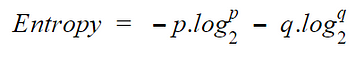

**Steps to calculate entropy for a split:**

- Calculate the entropy of the parent node
- Calculate entropy of each individual node of split and calculate the weighted average of all sub-nodes available in the split. The lesser the entropy, the better it is.
- Calculate information gain as follows and chose the node with the highest information gain for splitting

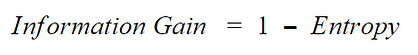

## Reduction in Variance
Till now, we have discussed the algorithms for the categorical target variable. Reduction in variance is an algorithm used for continuous target variables (regression problems).

- Used for continuous variables
- This algorithm uses the standard formula of variance to choose the best split.
- The split with lower variance is selected as the criteria to split the population


**Steps to calculate Variance:**

- Calculate variance for each node.
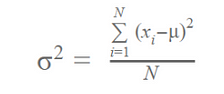

- Calculate variance for each split as a weighted average of each node variance.
- The node with lower variance is selected as the criteria to split.



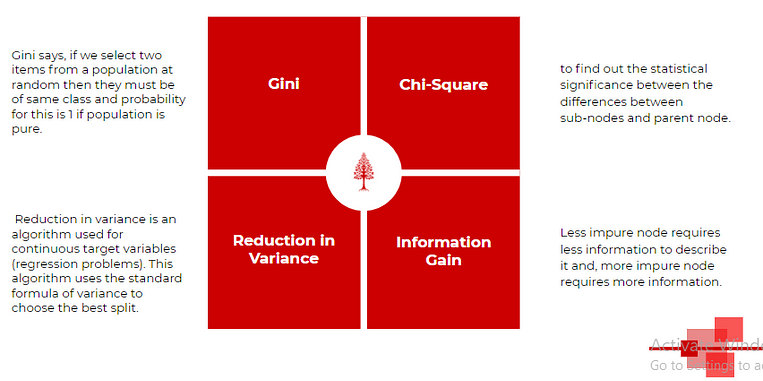

In practice, most of the time Gini impurity is used as it gives good results for splitting and its computation is inexpensive. Let’s build a tree with a pen and paper. We have a dummy dataset below, the features(X) are **Chest pain, Good blood circulation, Blocked arteries** and to be predicted column is **Heart disease(y)**. Every column has two possible options yes and no.

We aim to build a decision tree where given a new record of chest pain, good blood circulation, and blocked arteries we should be able to tell if that person has heart disease or not. At the start, all our samples are in the root node. We will have to decide on which of the feature the root node should be divided first.

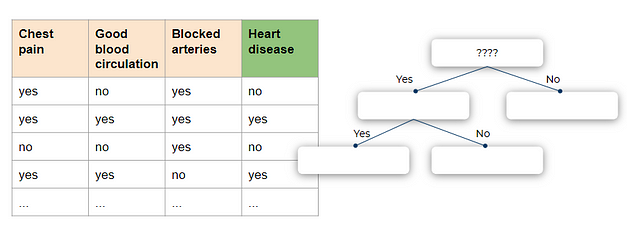
We will focus first on how heart disease is changing with Chest pain (ignoring good blood circulation and blood arteries). the dummy numbers are shown below

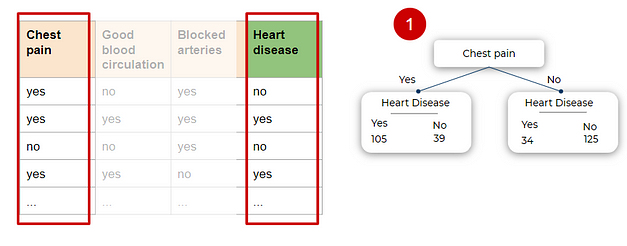
Similarly, we divide based on good blood circulation as shown in the below image.



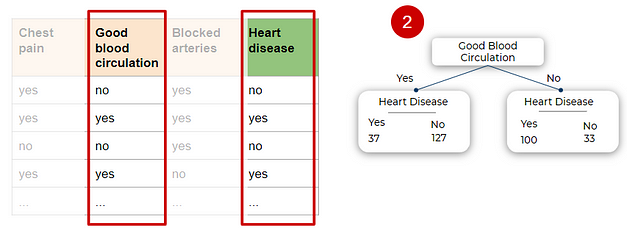

And with respect to blocked arteries as below image.

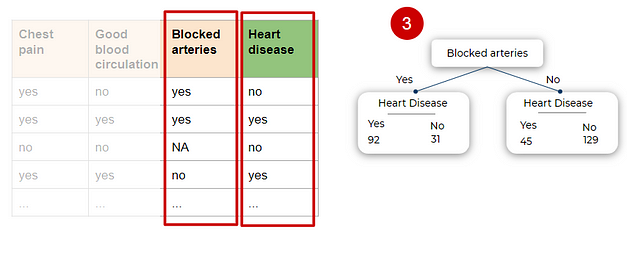
Taking all three splits at one place in the below image. We can observe that, it is not a great split on any of the feature alone for heart disease yes or no which means that one of these can be a root node but its not a full tree, we will have to split again down the tree in hope of better split.

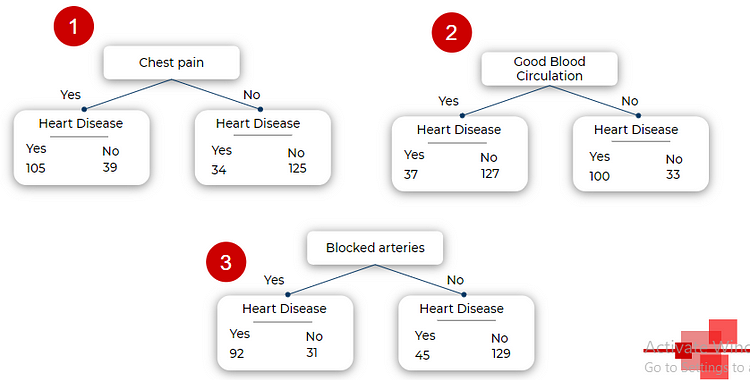
To decide on which one feature should the root node be split, we need to calculate the Gini impurity for all the leaf nodes as shown below. After calculating for leaf nodes, we take its weighted average to get Gini impurity about the parent node.

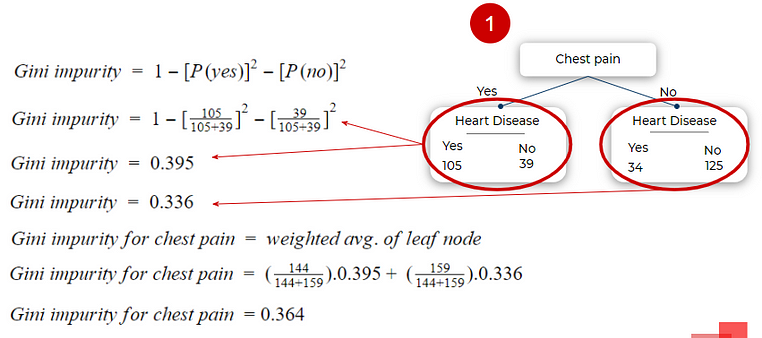
We do this for all three features and select the one with the least Gini impurity as it is splitting the dataset in the best way out of three. Hence we choose good blood circulation as the root node.

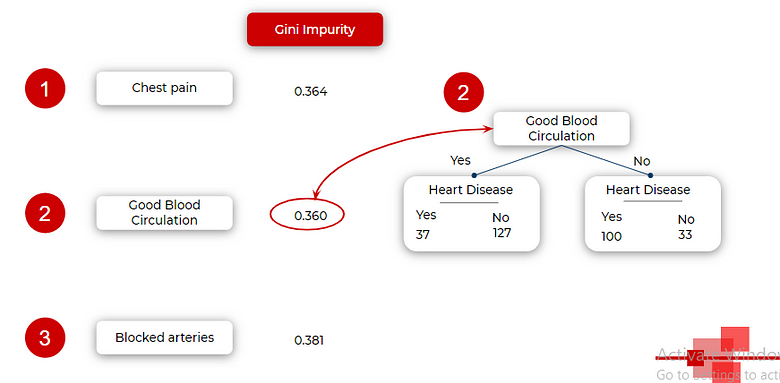
We do the same for a child node of Good blood circulation now. In the below image we will split the left child with a total of 164 sample on basis of blocked arteries as its Gini impurity is lesser than chest pain(we calculate Gini index again with the same formula as above, just a smaller subset of the sample — 164 in this case).

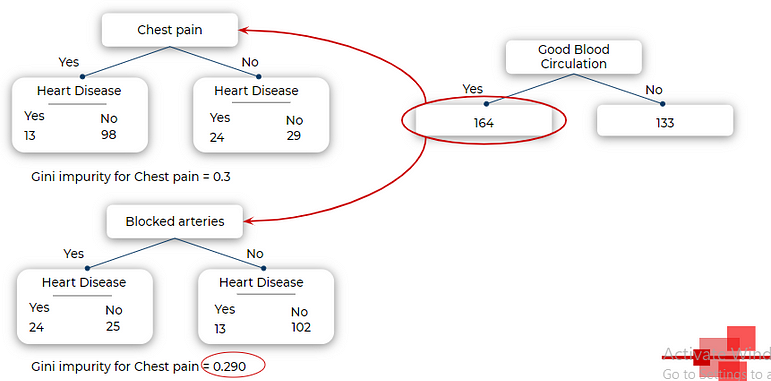
One thing to note in the below image that, when we try to split the right child of blocked arteries on basis of chest pain, the Gini index is 0.29 but the Gini impurity of the right child of the blocked tree itself, is 0.20. This means that splitting this node any further is not improving impurity. so this will be a leaf node.

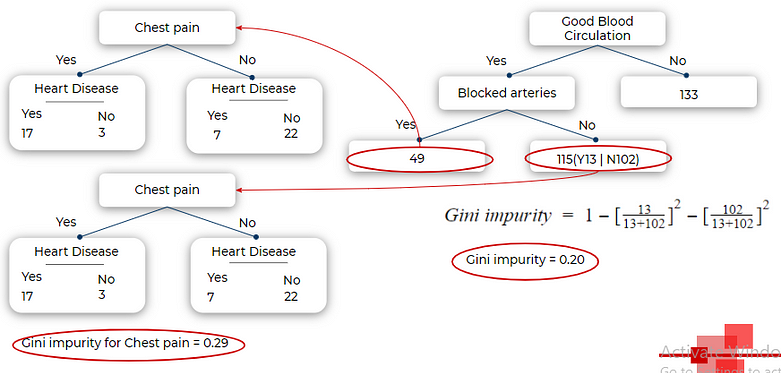
We repeat the same process for all the nodes and we get the following tree. This looks a good enough fit for our training data.

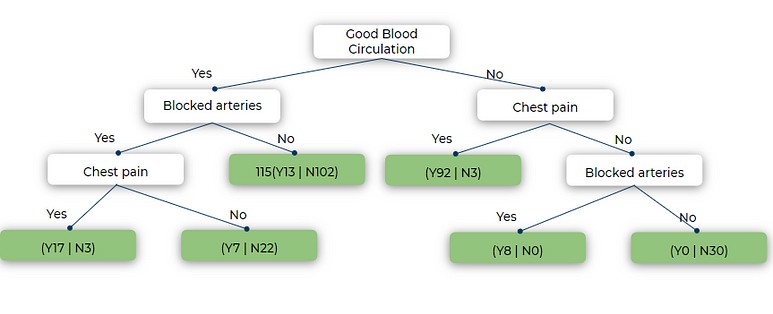
This is how we create a tree from data. What should we do if we have a column with numerical values? It is simple, order them in ascending order. Calculate the mean on every two consecutive numbers. make a split on basis of that and calculate Gini impurity using the same method. We choose the split with the least Gini impurity as always.

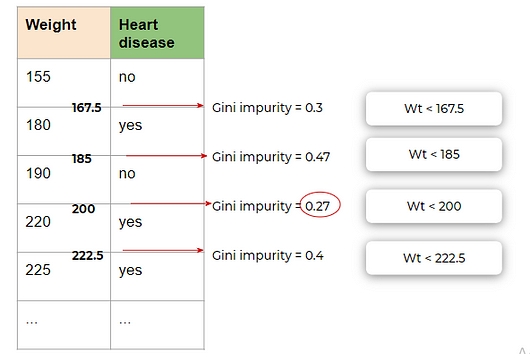
If we have ranked the numerical column in the dataset, we split on every rating and calculate Gini impurity for each split, and select the one with the least Gini impurity.

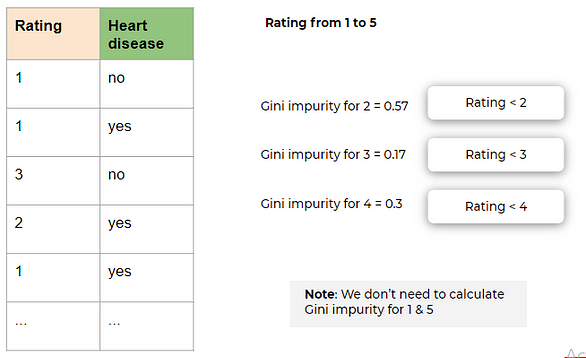
If we have categorical choices in our dataset then the split and Gini impurity calculation needs to be done on every possible combination of choices

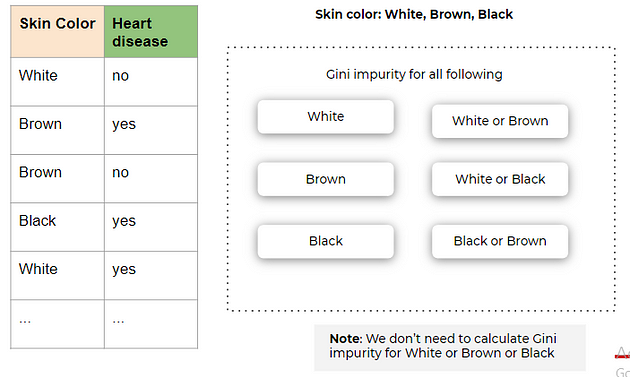


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [132]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [133]:
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [134]:
df.shape

(150, 5)

In [135]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [136]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'species')

In [137]:
# correlation matrix
sns.heatmap(df.corr())


ValueError: could not convert string to float: 'setosa'

#### Data Preprocessing


In [ ]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)

In [ ]:
# Defining the attributes
X = df1

In [ ]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

In [ ]:
y=target

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)
